# Sonoran Desert: CMIP6 projections
#### Evaporation in 2025
Evaporation in 2025, 2050, 2075 and 2100  for the climate scenarios SSP1-2.6, SSP2-4.5 and SSP5-8.5. The camel that is used for this notebook is: hysets_09488650

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import matplotlib.pyplot as plt
from cartopy import crs
from cartopy import feature as cfeature
import fiona
import shapely.geometry
from pyproj import Geod
from rich import print
import pandas as pd
import xarray as xr

import ewatercycle.forcing
import ewatercycle.models
import ewatercycle.parameter_sets

### Setting up the model: SSP1-2.6
Location of the groundwater recharge: Gila river near Yuma.

In [2]:
station_latitude = 32.71555556
station_longitude = -114.533386

Loading the parameter set and forcing set. Setting up the PCR-GlobWB model. 

In [3]:
parameter_set = ewatercycle.parameter_sets.ParameterSet(
    name="custom_parameter_set",
    directory= "/data/shared/parameter-sets/pcrglobwb_global",
    config="./pcrglobwb_sonoran_ERA5_05min.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)
#print(parameter_set)

In [4]:
forcing126 = ewatercycle.forcing.sources["PCRGlobWBForcing"].load(
    directory="/home/emol/forcing/sonoran_desert_CMIP_SSP126/work/diagnostic/script",
)
#print(forcing)

In [5]:
pcrglob126 = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set,
    forcing=forcing126
)
#print(pcrglob)

Starting and initializing the model

In [7]:
#start_time = "2025-01-01T00:00:00Z"
#end_time = "2025-12-31T00:00:00Z"

cfg_file126, cfg_dir126 = pcrglob126.setup(
    end_time="2025-09-30T00:00:00Z",
    max_spinups_in_years=0
)
cfg_file126, cfg_dir126

('/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250106_152501/pcrglobwb_ewatercycle.ini',
 '/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250106_152501')

In [8]:
pcrglob126.initialize(cfg_file126)

In [9]:
time126 = pd.date_range(pcrglob126.start_time_as_isostr, pcrglob126.end_time_as_isostr)
timeseries126 = pd.DataFrame(
    index=pd.Index(time126, name="time"), columns=["PCRGlobWB: Sonoran Desert"]
)
recharge126 = pd.DataFrame(
    index=pd.Index(time126, name="time"), columns=["PCRGlobWB: Sonoran Desert"]
)

In [10]:
while pcrglob126.time < pcrglob126.end_time:
    pcrglob126.update()

    precipitation_at_station126 = pcrglob126.get_value_at_coords(
        "precipitation", lat=[station_latitude], lon=[station_longitude]
    )

    landsurface_at_station126 = pcrglob126.get_value_at_coords(
        "land_surface_runoff", lat=[station_latitude], lon=[station_longitude]
    )
    
    evaporation_at_station126 = pcrglob126.get_value_at_coords(
        "total_evaporation", lat=[station_latitude], lon=[station_longitude]
    )

    recharge_at_station126 = pcrglob126.get_value_at_coords(
        "groundwater_recharge", lat=[station_latitude], lon=[station_longitude]
    )
    
    time126 = pcrglob126.time_as_isostr
    timeseries126["PCRGlobWB: Sonoran Desert"][time126] = precipitation_at_station126[0] + landsurface_at_station126[0] - evaporation_at_station126[0] 
    recharge126["PCRGlobWB: Sonoran Desert"][time126] = recharge_at_station126[0]

    # Show progress
    #print(time126,end='\r')  # "\r" clears the output before printing the next timestamp


Approximation of groundwater recharge of SSP1-2.6.

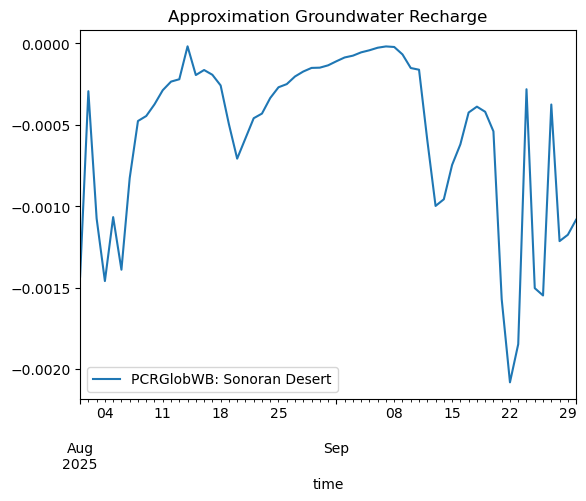

In [11]:
timeseries126.plot()
plt.title("Approximation Groundwater Recharge");

Comparing the approximation with the groundwater recharge that is simulated with PCR-GlobWB.

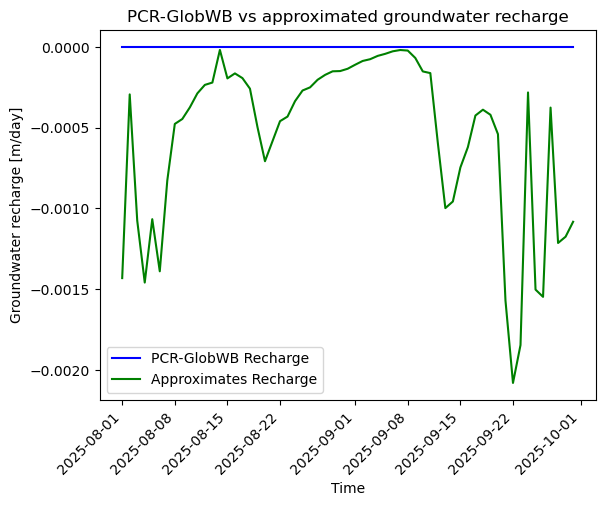

In [12]:
plt.plot(recharge126, label="PCR-GlobWB Recharge", color="blue")
plt.plot(timeseries126, label="Approximates Recharge", color="green")
plt.title("PCR-GlobWB vs approximated groundwater recharge")
plt.ylabel("Groundwater recharge [m/day]")
plt.xlabel("Time")
plt.xticks(rotation=45, ha='right')
plt.legend();

### Now for SSP4-6.0
First, set up the forcing that will be used in the model.

In [13]:
parameter_set = ewatercycle.parameter_sets.ParameterSet(
    name="custom_parameter_set",
    directory= "/data/shared/parameter-sets/pcrglobwb_global",
    config="./pcrglobwb_sonoran_ERA5_05min.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)

In [14]:
forcing245 = ewatercycle.forcing.sources["PCRGlobWBForcing"].load(
    directory="/home/emol/forcing/sonoran_desert_CMIP_SSP245/work/diagnostic/script",
)

In [15]:
pcrglob245 = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set,
    forcing=forcing245
)

In [16]:
#start_time = "2025-01-01T00:00:00Z"
#end_time = "2025-12-31T00:00:00Z"

cfg_file245, cfg_dir245 = pcrglob245.setup(
    end_time="2025-09-30T00:00:00Z",
    max_spinups_in_years=0
)
cfg_file245, cfg_dir245

('/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250106_152908/pcrglobwb_ewatercycle.ini',
 '/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250106_152908')

In [17]:
pcrglob245.initialize(cfg_file245)

In [18]:
time245 = pd.date_range(pcrglob245.start_time_as_isostr, pcrglob245.end_time_as_isostr)
timeseries245 = pd.DataFrame(
    index=pd.Index(time245, name="time"), columns=["PCRGlobWB: Sonoran Desert"]
)

In [19]:
while pcrglob245.time < pcrglob245.end_time:
    pcrglob245.update()
    
    precipitation_at_station245 = pcrglob245.get_value_at_coords(
        "precipitation", lat=[station_latitude], lon=[station_longitude]
    )

    landsurface_at_station245 = pcrglob245.get_value_at_coords(
        "land_surface_runoff", lat=[station_latitude], lon=[station_longitude]
    )
    
    evaporation_at_station245 = pcrglob245.get_value_at_coords(
        "total_evaporation", lat=[station_latitude], lon=[station_longitude]
    )
   
    time245 = pcrglob245.time_as_isostr
    timeseries245["PCRGlobWB: Sonoran Desert"][time245] = precipitation_at_station245[0] + landsurface_at_station245[0] - evaporation_at_station245[0] 
    # Show progress
    #print(time245,end='\r')  # "\r" clears the output before printing the next timestamp


<Axes: xlabel='time'>

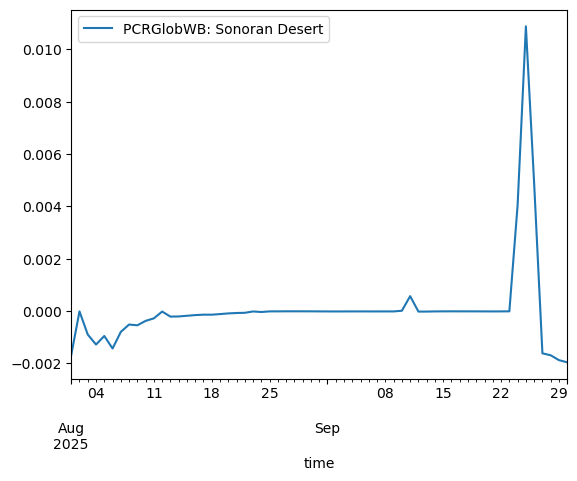

In [20]:
timeseries245.plot()

### Now for SSP5-8.5
First, set up the forcing.

In [21]:
parameter_set = ewatercycle.parameter_sets.ParameterSet(
    name="custom_parameter_set",
    directory= "/data/shared/parameter-sets/pcrglobwb_global",
    config="./pcrglobwb_sonoran_ERA5_05min.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)
#print(parameter_set)

In [22]:
forcing585 = ewatercycle.forcing.sources["PCRGlobWBForcing"].load(
    directory="/home/emol/forcing/sonoran_desert_CMIP_SSP585/work/diagnostic/script",
)
#print(forcing)

In [23]:
pcrglob585 = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set,
    forcing=forcing585
)

In [24]:
#start_time = "2025-01-01T00:00:00Z"
#end_time = "2025-12-31T00:00:00Z"

cfg_file585, cfg_dir585 = pcrglob585.setup(
    end_time="2025-09-30T00:00:00Z",
    max_spinups_in_years=0
)
cfg_file585, cfg_dir585

('/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250106_153215/pcrglobwb_ewatercycle.ini',
 '/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250106_153215')

In [25]:
pcrglob585.initialize(cfg_file585)

In [26]:
time585 = pd.date_range(pcrglob585.start_time_as_isostr, pcrglob585.end_time_as_isostr)
timeseries585 = pd.DataFrame(
    index=pd.Index(time585, name="time"), columns=["PCRGlobWB: Sonoran Desert"]
)

In [27]:
while pcrglob585.time < pcrglob585.end_time:
    pcrglob585.update()

    precipitation_at_station585 = pcrglob585.get_value_at_coords(
        "precipitation", lat=[station_latitude], lon=[station_longitude]
    )

    landsurface_at_station585 = pcrglob585.get_value_at_coords(
        "land_surface_runoff", lat=[station_latitude], lon=[station_longitude]
    )
    
    evaporation_at_station585 = pcrglob585.get_value_at_coords(
        "total_evaporation", lat=[station_latitude], lon=[station_longitude]
    )
   
    time585 = pcrglob585.time_as_isostr
    timeseries585["PCRGlobWB: Sonoran Desert"][time585] = precipitation_at_station585[0] + landsurface_at_station585[0] - evaporation_at_station585[0] 

    # Show progress
    #print(time585,end='\r')  # "\r" clears the output before printing the next timestamp


<Axes: xlabel='time'>

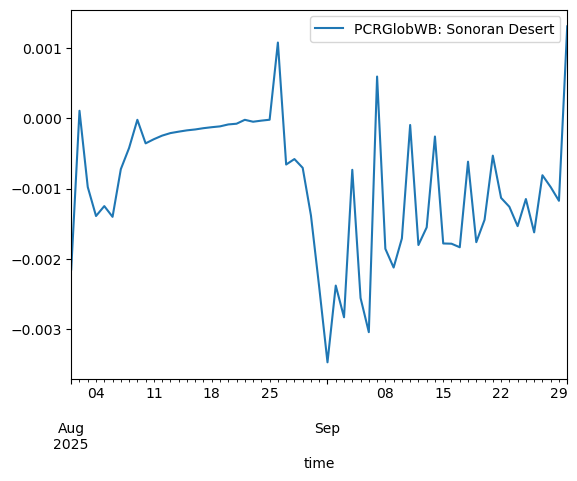

In [28]:
timeseries585.plot()

### Plotting the timeseries

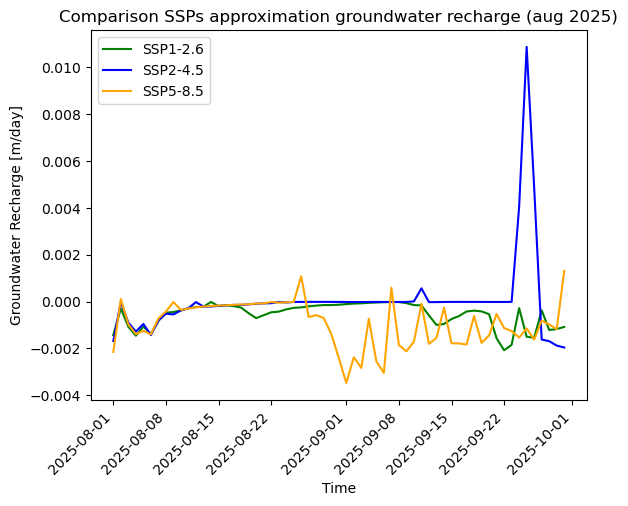

In [29]:
plt.plot(timeseries126, label="SSP1-2.6", color="green")
plt.plot(timeseries245, label="SSP2-4.5", color="blue")
plt.plot(timeseries585, label="SSP5-8.5", color="orange")

plt.title("Comparison SSPs approximation groundwater recharge (aug 2025)")
plt.xlabel("Time")
plt.ylabel("Groundwater Recharge [m/day]")
plt.xticks(rotation=45, ha='right')
plt.legend(loc=2);

### Comparing to PCR-GlobWB groundwater recharge

In [ ]:
pcrglob126.finalize()
pcrglob245.finalize()
pcrglob585.finalize()